In [1]:
#import dependencies

import os
import scipy.io
import numpy as np
import re
from mvpa2.suite import *
import matplotlib.pyplot as plt
from scipy import stats
 

Failed to import duecredit due to No module named 'duecredit'
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/opt/conda/lib/python3.6/site-packages/mvpa2/datasets/sources/skl_data.py:32: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  argnames, varargs, varkw, defaults = inspect.getargspec(fx)
<string>:60: DeprecationWarning: invalid escape sequence \#
<string>:59: DeprecationWarning: invalid escape sequence \#
<string>:59: DeprecationWarning: invalid escape sequence \#
<string>:65: DeprecationWarning: invalid escape sequence \c


In [2]:
folder = "/mnt/tutorials/sherlock_nifti_kit_v2_withdata/subjects/"
subfolders = [f.path for f in os.scandir(folder) if f.is_dir() ]

In [3]:
roifile='pmc_nn'

In [4]:
#load the data for all subjects for one ROI file
#the data has 1976 timepoints and 481 voxels
run_datasets=[];
for i in subfolders:
    #load data 
    res = re.findall("subjects/s([0-9]+)", i)
    mat=scipy.io.loadmat(i + '/sherlock_movie/' + roifile + '_sherlock_movie_s' + res[0])
    data=np.transpose(mat['rdata'])
    
    # put into pymvpa structure
    ds=dataset_wizard(data)
    run_datasets.append(ds)

In [5]:
#run hyperalignment
hyper = Hyperalignment()
hypmaps = hyper(run_datasets)
ds_hyper = [h.forward(sd) for h, sd in zip(hypmaps, run_datasets)]

## **Visualize some changes to the data**

To-do: 
* Expand on the visualizations by plotting some summary stats (e.g. voxel histograms)

Text(0,0.5,'Voxel')

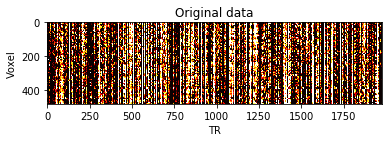

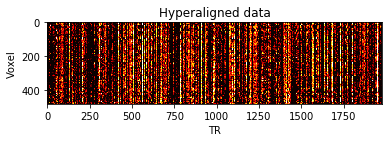

In [76]:
# compare original data with hyperaligned data for one subject
sub1_orig=np.array(run_datasets[1])
sub1_hyper=np.array(ds_hyper[1])

fig, ax = plt.subplots()
ax.imshow(sub1_orig.T, cmap=plt.get_cmap('hot'), interpolation='nearest',
               vmin=0, vmax=1)
plt.title('Original data')
plt.xlabel('TR')
plt.ylabel('Voxel')

fig, ax = plt.subplots()
ax.imshow(sub1_hyper.T, cmap=plt.get_cmap('hot'), interpolation='nearest',
               vmin=0, vmax=1)
plt.title('Hyperaligned data')
plt.xlabel('TR')
plt.ylabel('Voxel')

Text(0,0.5,'TR')

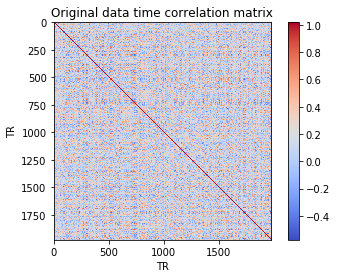

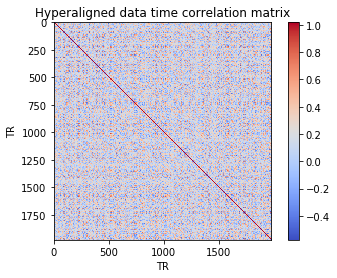

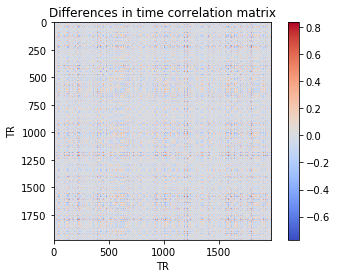

In [77]:
# time*time similarity matrix - which should not change with hyperalignment
time_cmat_orig=np.corrcoef(sub1_orig)
time_cmat_hyper=np.corrcoef(sub1_hyper)

fig, ax = plt.subplots()
ax.imshow(time_cmat_orig, cmap=plt.get_cmap('coolwarm'), interpolation='nearest')
cbar = fig.colorbar(cax)
plt.title('Original data time correlation matrix')
plt.xlabel('TR')
plt.ylabel('TR')

fig, ax = plt.subplots()
ax.imshow(time_cmat_hyper, cmap=plt.get_cmap('coolwarm'), interpolation='nearest')
cbar = fig.colorbar(cax)
plt.title('Hyperaligned data time correlation matrix')
plt.xlabel('TR')
plt.ylabel('TR')

fig, ax = plt.subplots()
cax=ax.imshow(time_cmat_orig-time_cmat_hyper, cmap=plt.get_cmap('coolwarm'), interpolation='nearest')
cbar = fig.colorbar(cax)
plt.title('Differences in time correlation matrix')
plt.xlabel('TR')
plt.ylabel('TR')


Text(0,0.5,'TR')

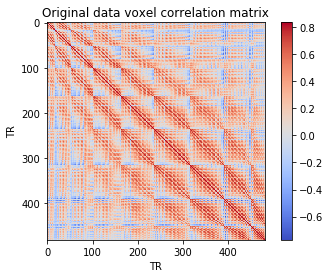

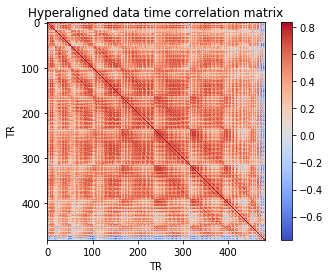

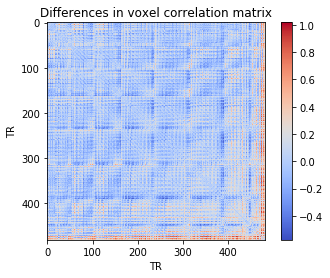

In [78]:
# vox*vox similarity matrix - which should change with hyperalignment
vox_cmat_orig=np.corrcoef(sub1_orig.T)
vox_cmat_hyper=np.corrcoef(sub1_hyper.T)

fig, ax = plt.subplots()
ax.imshow(vox_cmat_orig, cmap=plt.get_cmap('coolwarm'), interpolation='nearest')
cbar = fig.colorbar(cax)
plt.title('Original data voxel correlation matrix')
plt.xlabel('TR')
plt.ylabel('TR')

fig, ax = plt.subplots()
ax.imshow(vox_cmat_hyper, cmap=plt.get_cmap('coolwarm'), interpolation='nearest')
cbar = fig.colorbar(cax)
plt.title('Hyperaligned data time correlation matrix')
plt.xlabel('TR')
plt.ylabel('TR')

fig, ax = plt.subplots()
cax=ax.imshow(vox_cmat_orig-vox_cmat_hyper,cmap=plt.get_cmap('coolwarm'), interpolation='nearest')
cbar = fig.colorbar(cax)
plt.title('Differences in voxel correlation matrix')
plt.xlabel('TR')
plt.ylabel('TR')